In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h1>House Price Prediction: EDA</h1>
<h3>Introduction: </h3><br>
<b>Data Statistics :</b>
<pre>
    Number of House Data Enteries: 21613
    Highest Price of a Property:   7.7 Lacs
    Most Ancient Property:         1900
    Maximum Square Footage Area :  16,51,359 Sq Ft
    Maximum Bedroom's in a House:  33
</pre>
<br>
<b>Data Fields Explanation:</b>
<pre>
The House Price Prediction Dataset consists of 21,613 House Data Enteries. This Dataset consists of a Single CSV file,           Data.csv. The columns in the table are:
    Id            : Unique row number
    Date          : The Date Price was Last Checked
    Price         : The Price of the Property
    Bedrooms      : Number of Bedrooms
    Bathrooms     : Number of Bathrooms
    Sqft_living   : Square Footage of Living Room
    Sqft_lot      : Square Footage of Lot.
    Floors        : Number of Floors
    Waterfront    : If the House has a Waterfront
    View          : If the House has a View
    Condition     : Condition of the House 1 Being the Best
    Grade         : Grade Assigned
    Sqft_above    : Square Footage of Above
    Sqft_basement : Square Footage of Basement
    Yr_built      : Year The House was built
    Yr_renovated  : Year The House was built
    Zipcode       : Zipcode 
    Lat           : Latitude
    Long          : Longitude
</pre>


In [3]:
df = pd.read_csv("data.csv")

In [3]:
# Printing first 5 rows of data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Observing shape of data
df.shape

(21613, 21)

In [8]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


<b>Note</b>: Observe that there are no missing values in the data

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [49]:
df.apply(np.min)

id                       1000102
date             20140502T000000
price                      75000
bedrooms                       0
bathrooms                      0
sqft_living                  290
sqft_lot                     520
floors                         1
waterfront                     0
view                           0
condition                      1
grade                          1
sqft_above                   290
sqft_basement                  0
yr_built                    1900
yr_renovated                   0
zipcode                    98001
lat                      47.1559
long                    -122.519
sqft_living15                399
sqft_lot15                   651
dtype: object

## 1. Univariate Analysis

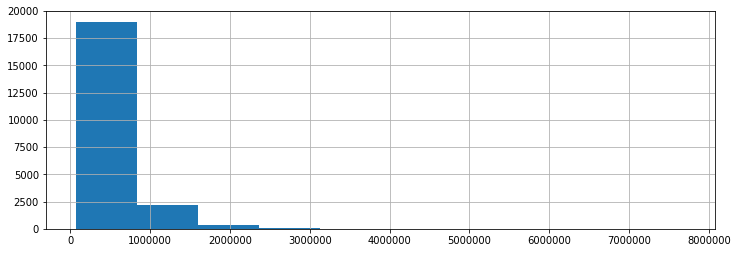

In [18]:
df['price'].hist(figsize=(12,4))

<b>Observation</b> In the above plot, we see that price is prominently skewed right and more than 17K houses has a price range between 1 lac to 7 lac.

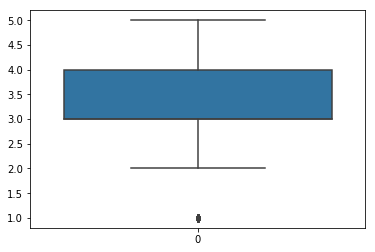

In [23]:
sns.boxplot(data=df['condition'])

<b>Observation</b> In the above plot, we see that most houses are in good shape lying in between condition grade of 3.0 to 4.0 .

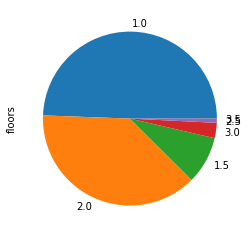

In [34]:
df['floors'].value_counts().plot(kind='pie')

<b>Observation</b> About 50% of houses has 1 floor, about 30% has 2 floors houses with more than 3 floors are very rare.

## 2. Bivariate Analysis

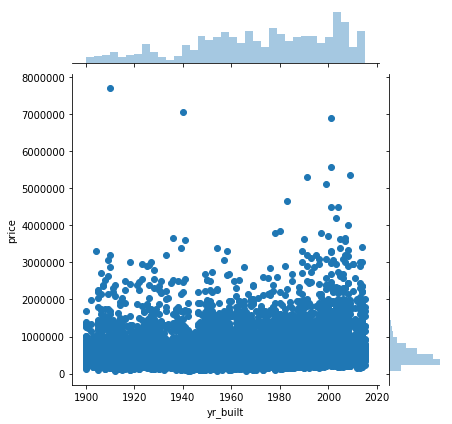

In [42]:
sns.jointplot(x='yr_built', y='price',data=df, kind='scatter')

<b>Observation</b> We see that prices go higher with increasing year of built.

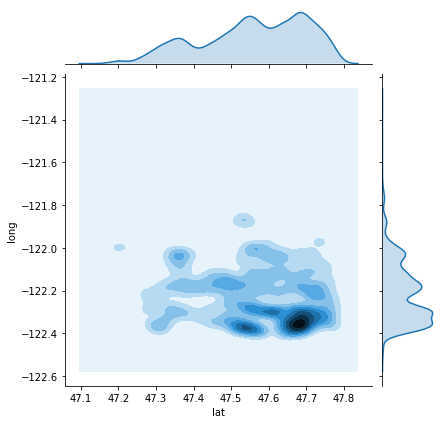

In [50]:
sns.jointplot(x='lat', y='long',data=df, kind='kde')

<b>Observation</b> We see that most houses are loacated in 47.6 to 47.7 latitude and -122.4 to -122.2 longitude

## Multivariate Analysis

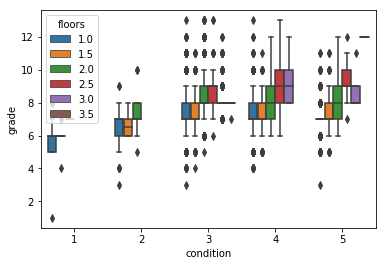

In [18]:
sns.boxplot(x='condition', y='grade', hue='floors', data=df)

<b>Observation</b> We observe that the houses with condition 3 or 4 has higher number of floors with an average grade of 9.

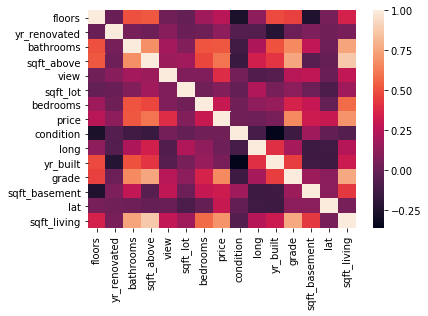

In [31]:
sns.heatmap(df[list(set(df.columns)-set(['id', 'waterfront', 'zipcode', 'sqft_lot15', 'sqft_living15']))].corr())

<b>Observation</b>We observe that the price of the house is less correlated to the grade but highly correlated to the condition of the house. Also the condition of the house highly depends on the year in which it is built.

## Summary

* More than 17K houses has a price range between 1 lac to 7 lac.
* Prices go higher with increasing year of built.
* Most houses are loacated in 47.6 to 47.7 latitude and -122.4 to -122.2 longitude.
* Houses with better condition are must costlier.